In [1]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import eigs

edges_file = open('wisconsin_edges.csv', "r")
nodes_file = open('wisconsin_nodes.csv', "r")

# create a dictionary where nodes_dict[i] = name of wikipedia page
nodes_dict = {}
for line in nodes_file:
    nodes_dict[int(line.split(',',1)[0].strip())] = line.split(',',1)[1].strip()

node_count = len(nodes_dict)

# create adjacency matrix
A = np.zeros((node_count, node_count))
for line in edges_file:
    from_node = int(line.split(',')[0].strip())
    to_node = int(line.split(',')[1].strip())
    A[to_node, from_node] = 1.0

## Add code below to (1) prevent traps and (2) find the most important pages     
# Hint -- instead of computing the entire eigen-decomposition of a matrix X using
# s, E = np.linalg.eig(A)
# you can compute just the first eigenvector with:
# s, E = eigs(csc_matrix(A), k = 1)

## 1)

In [2]:
#1a
A += 0.001

A = A / np.sum(A, axis=0)

A_csc = csc_matrix(A)

eigenvalues, eigenvector = eigs(A_csc, k=1, which='LR')

pagerank_vector = np.abs(eigenvector).flatten()
pagerank_vector /= np.sum(pagerank_vector)

sorted_indices = np.argsort(-pagerank_vector)

first_page_title = nodes_dict[sorted_indices[0]]
third_page_title = nodes_dict[sorted_indices[2]]

In [3]:
#1b 
print(first_page_title)

"Wisconsin"


In [4]:
#1c
print(third_page_title)

"Madison, Wisconsin"


## 2)

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle

data = open('classifier_data.pkl', 'rb')
X_train, y_train = pickle.load(data)
n_train = np.size(y_train)
# y_train 2000x2000
# X_train 4000x2000

In [6]:
#2a

#The logistic loss function has logarithmic behavior which prevents it from heavily penalizing easy to 
#classify data in the squared error loss of a linary linear classification problem. For correctly classified 
#instances, the logistic loss applies a gradual penalty, making it suitable for these classfication cases.

In [7]:
# ***2b is on the pdf***

In [8]:
#2c
def prxgraddescent(X,y,tau,lam,w_init,it):
    W = w_init
    grad = [0, 0]
    for k in range(it):
        #w = W[:,[k]]
        for i in range (n_train):
            xiT = X[:, [i]]
            yi = y[i]
            grad += (-yi) / (1 + np.exp(yi * xiT.T @ W))*xiT 
        grad = grad + 2*lam*W #np.array(([grad[0]], [grad[1]])) * (2 * lam * w)
        W = W - (tau * grad) #W[:,[k+1]] = W[:,[k]] - (tau * grad)
    return [W, xiT]

w_0 = np.array([[0],[0],[0]])
lam = 1
it = 10
tau = 2/(35**2)
Xadd= np.hstack((X_train, np.ones((n_train,1))))
y=np.squeeze(y_train)

W = prxgraddescent(Xadd.T, y, tau, lam, w_0, it)
print(W[0][:, 1])

[-7.76628103 10.15798175 -2.94746308]


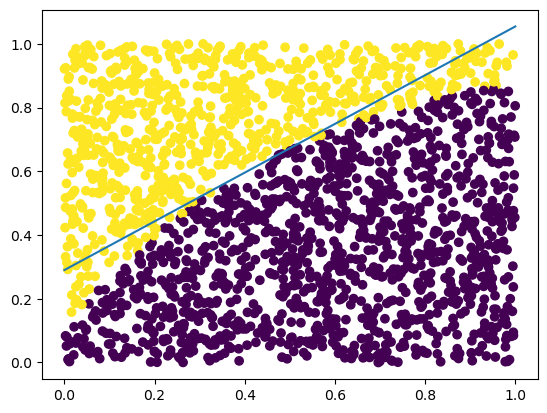

error rate: 0.615


In [9]:
#2d)
slope = -W[0][0,0]/W[0][1,0]
y_int = -W[0][2,0]/W[0][1,0]

plt.plot([0,1], [y_int, y_int + slope])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[:,0])
plt.show()

print('error rate:', np.mean(y_train!=np.sign(W[1].T@W[0]) ))

In [10]:
#2e
#TRAIN CLASSIFIER SE
def prxgraddescent_SE(X, y, tau, lam, w_init, it):
    W = w_init
    n_train = X.shape[1]  # Assuming X is of shape (features, samples)
    
    for k in range(it):
        grad = np.zeros_like(W, dtype=float)  # Initialize gradient to zeros with float type
        for i in range(n_train):
            xiT = X[:, [i]]
            yi = y[i]
            sigmoid_term = 1 / (1 + np.exp(-yi * xiT.T @ W))
            grad += (-2 * (yi - sigmoid_term) * sigmoid_term * (1 - sigmoid_term)) * xiT
        grad = grad + 2 * lam * W
        W = W - tau * grad
    return [W, xiT]

w_0 = np.array([[0],[0],[0]])
lam = 1
it = 10
tau = 2/(35**2)
Xadd= np.hstack((X_train, np.ones((n_train,1))))
y=np.squeeze(y_train)

W_SE = prxgraddescent_SE(Xadd.T, y, tau, lam, w_0, it)
print(W_SE[0])

[[-1.94041608]
 [-0.42102978]
 [-2.98190819]]


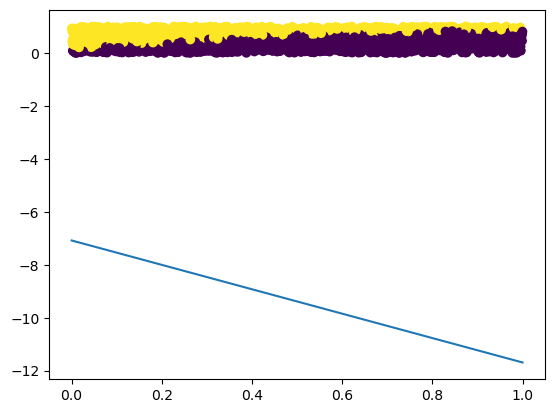

error rate: 0.385


In [11]:
slope = -W_SE[0][0,0]/W_SE[0][1,0]
y_int = -W_SE[0][2,0]/W_SE[0][1,0]

plt.plot([0,1], [y_int, y_int + slope])
plt.scatter(X_train[:,0],X_train[:,1], c=y_train[:,0])
plt.show()

print('error rate:', np.mean(y_train!=np.sign(W_SE[1].T@W_SE[0]) ))
# SE loss performs better than the logistic loss

In [12]:
#2f 
x_new = np.array(1000*[[0,10]])
y_new=1000*[[1]]
x_train_2 = np.vstack((X_train, x_new))
y_train_2 = np.vstack((y_train, y_new))
n_train_2 = np.size(y_train_2)

w_0 = np.array([[0],[0],[0]])
lam = 1
it = 10
tau = 2/(35**2)
Xadd= np.hstack((x_train_2, np.ones((n_train_2,1))))
y=np.squeeze(y_train_2)


#TRAIN CLASSIFIER LOG
W = prxgraddescent(Xadd.T, y, tau, lam, w_0, it)
print(' Log error rate:', np.mean(y_train_2!=np.sign(W[1].T@W[0]) ))

#TRAIN CLASSIFIER SE
W_SE = prxgraddescent_SE(Xadd.T, y, tau, lam, w_0, it) 
print('SE error rate:', np.mean(y_train_2!=np.sign(W_SE[1].T@W_SE[0]) ))

#They perform the same

 Log error rate: 0.41
SE error rate: 0.41
